In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
#from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [69]:
iris=pd.read_csv("C:/Users/saurav/Desktop/code_stack_python/Iris Project/Iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [70]:
X=iris.iloc[:,:4].values
y=iris['Species'].values

In [71]:
print(y)
print(X)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

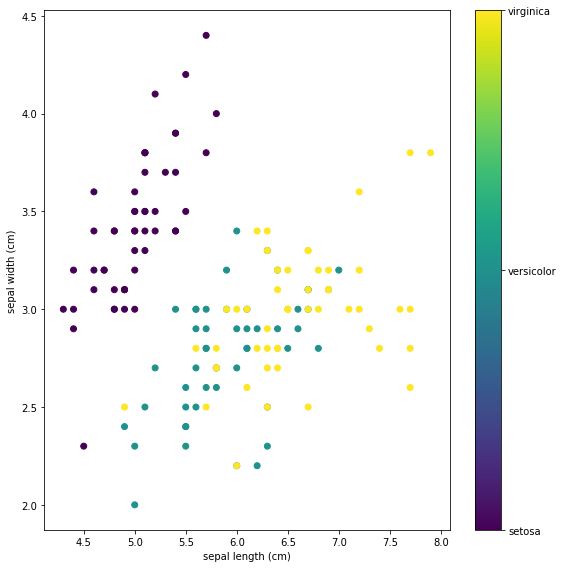

In [144]:
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 8))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()


In [177]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=28)

In [178]:
### NORMALIZTION / FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [179]:
### WE WILL FIT THE THE CLASSIFIER TO THE TRAINING SET
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [180]:
y_pred = naiveClassifier.predict(X_test)

In [181]:
#Keeping the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#Actual->LEFT
#predicted->RIGHT
#Number of values to be print
y_compare[:20,:]

array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor']], dtype=object)

Text(0,0.5,'PREDICTED')

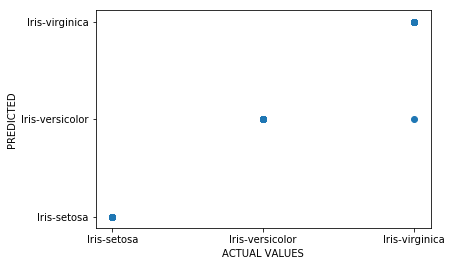

In [182]:
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED")

In [183]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


In [184]:
#finding accuracy from the confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  37
False predictions 1


Accuracy of the Naive Bayes Clasification is:  0.973684210526
